In [1]:
import pandas as pd

# 讀取CSV檔案
file_path = r"C:\Users\martin\Desktop\MLPROJECT\2023大里訓練用.csv"
data = pd.read_csv(file_path)

# 檢查資料的前幾行
print(data.head())
# 檢查資料的基本結構
print(data.info())


             time  AMB_TEMP   CH4    CO  NMHC   NO   NO2   NOx    O3  PM10  \
0  2023/1/1 00:00      17.9  2.21  0.45  0.13  0.8  14.0  14.9  13.9    30   
1  2023/1/1 01:00      17.7  2.18  0.42  0.12  0.6  15.7  16.4  12.4    27   
2  2023/1/1 02:00      17.6  2.22  0.46  0.14  0.4  15.0  15.5  11.3    29   
3  2023/1/1 03:00      17.2  2.20  0.50  0.14  1.3  17.9  19.2   4.3    36   
4  2023/1/1 04:00      17.0  2.22  0.46  0.13  1.1  15.8  17.0   5.7    32   

   PM2.5  RH  SO2   THC  WD_HR(SIN)  WD_HR(COS)  WD_HR  WS_HR  aqi  Index  
0     14  81  1.9  2.34   -0.965926    0.258819    285    0.2   28      1  
1     21  85  1.2  2.30   -0.656059    0.754710    319    0.2   31      2  
2     20  86  1.1  2.36    0.069756   -0.997564    176    0.1   38      3  
3     27  89  1.1  2.34    0.694658   -0.719340    136    0.8   44      4  
4     28  90  0.9  2.35   -0.970296   -0.241922    256    0.6   54      5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
D

In [2]:

# 檢查是否有缺失值
missing_values = data.isnull().sum()
print(missing_values)


time          0
AMB_TEMP      0
CH4           0
CO            0
NMHC          0
NO            0
NO2           0
NOx           0
O3            0
PM10          0
PM2.5         0
RH            0
SO2           0
THC           0
WD_HR(SIN)    0
WD_HR(COS)    0
WD_HR         0
WS_HR         0
aqi           0
Index         0
dtype: int64


In [5]:
from sklearn.preprocessing import StandardScaler
#data['month'] = data['time'].dt.month
#data['day'] = data['time'].dt.day
#data['hour'] = data['time'].dt.hour

import pickle
# 需要標準化的欄位列表
numerical_columns = ['AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5', 'RH', 'SO2', 'THC', 'WD_HR(SIN)', 'WD_HR(COS)' , 'WS_HR']

# 初始化標準化器
scaler = StandardScaler()

# 對數值型欄位進行標準化
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# 檢查標準化後的資料
print(data.head())
scaler_filename = "scalerForAE.pkl"
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

print(f"Scaler 已儲存到檔案: {scaler_filename}")


             time  AMB_TEMP       CH4        CO      NMHC        NO       NO2  \
0  2023/1/1 00:00 -1.329631  0.242989  0.601994  0.176633 -0.373451  0.274367   
1  2023/1/1 01:00 -1.368452  0.105041  0.412970  0.078072 -0.426255  0.521010   
2  2023/1/1 02:00 -1.387862  0.288972  0.665002  0.275194 -0.479058  0.419451   
3  2023/1/1 03:00 -1.465503  0.197007  0.917035  0.275194 -0.241442  0.840195   
4  2023/1/1 04:00 -1.504323  0.288972  0.665002  0.176633 -0.294246  0.535518   

        NOx        O3      PM10     PM2.5        RH       SO2       THC  \
0  0.059704 -0.745605 -0.115930 -0.114797  0.516088  0.640755  0.249178   
1  0.226531 -0.825246 -0.276752  0.559857  0.799474 -0.370274  0.110426   
2  0.126435 -0.883650 -0.169537  0.463478  0.870321 -0.514706  0.318555   
3  0.537943 -1.255311  0.205716  1.138131  1.082861 -0.514706  0.249178   
4  0.293263 -1.180979 -0.008714  1.234511  1.153707 -0.803572  0.283867   

   WD_HR(SIN)  WD_HR(COS)  WD_HR     WS_HR  aqi  Index  
0   -

In [4]:
# 提取時間特徵

# 檢查提取的特徵
print(data.head())


             time  AMB_TEMP       CH4        CO      NMHC        NO       NO2  \
0  2023/1/1 00:00 -1.329631  0.242989  0.601994  0.176633 -0.373451  0.274367   
1  2023/1/1 01:00 -1.368452  0.105041  0.412970  0.078072 -0.426255  0.521010   
2  2023/1/1 02:00 -1.387862  0.288972  0.665002  0.275194 -0.479058  0.419451   
3  2023/1/1 03:00 -1.465503  0.197007  0.917035  0.275194 -0.241442  0.840195   
4  2023/1/1 04:00 -1.504323  0.288972  0.665002  0.176633 -0.294246  0.535518   

        NOx        O3      PM10     PM2.5        RH       SO2       THC  \
0  0.059704 -0.745605 -0.115930 -0.114797  0.516088  0.640755  0.249178   
1  0.226531 -0.825246 -0.276752  0.559857  0.799474 -0.370274  0.110426   
2  0.126435 -0.883650 -0.169537  0.463478  0.870321 -0.514706  0.318555   
3  0.537943 -1.255311  0.205716  1.138131  1.082861 -0.514706  0.249178   
4  0.293263 -1.180979 -0.008714  1.234511  1.153707 -0.803572  0.283867   

   WD_HR(SIN)  WD_HR(COS)     WD_HR     WS_HR  aqi  Index  
0 

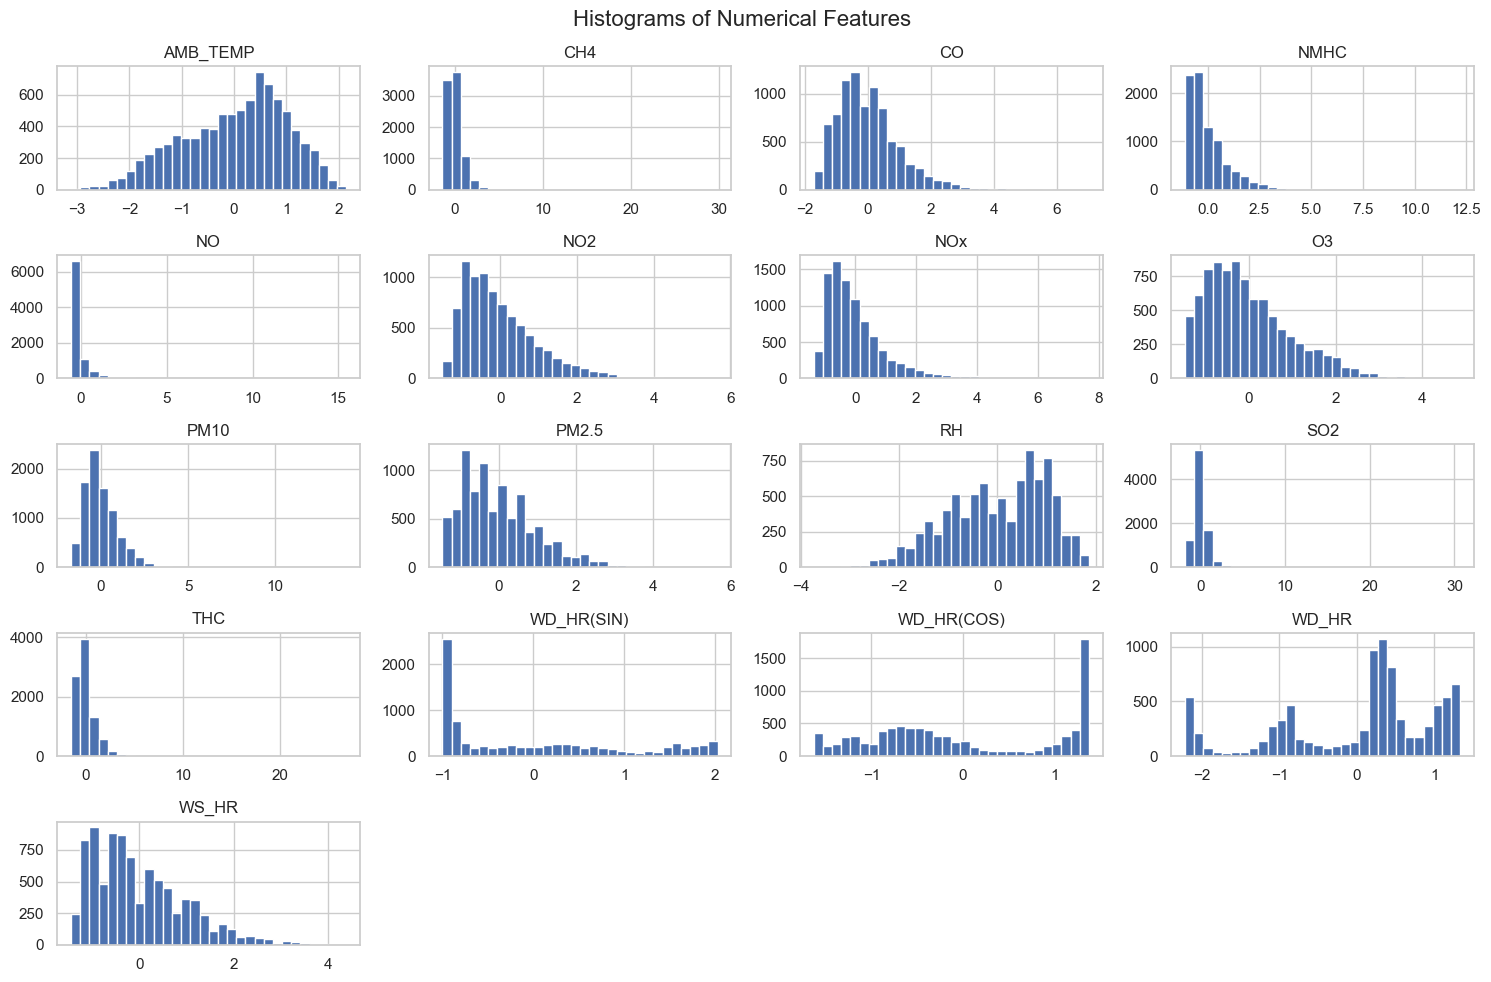

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 設定視覺化樣式
sns.set(style="whitegrid")

# 繪製各個欄位的直方圖
data[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


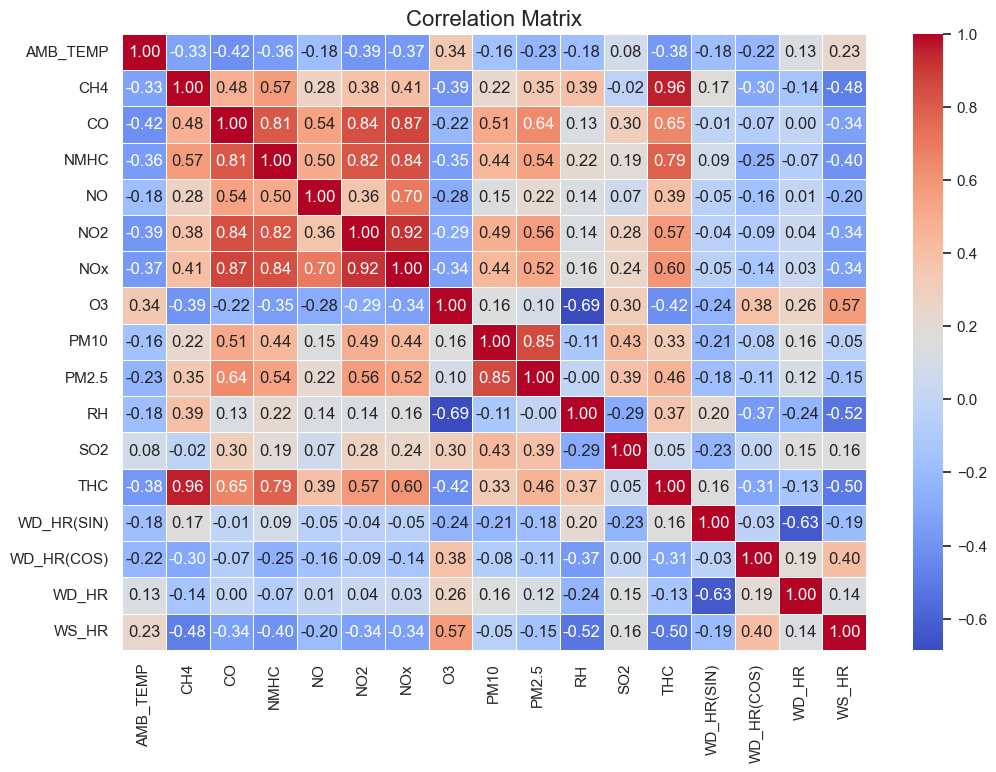

In [6]:
# 計算各特徵之間的相關係數
corr_matrix = data[numerical_columns].corr()

# 繪製熱圖
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()


In [7]:
X = data.drop(columns=['time','aqi','Index','WD_HR'])
y = data['aqi']

In [8]:
X.shape[1]

16

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# 假設 X 是特徵資料，已標準化，y 是目標變數
# X = data.drop(columns=['time', 'aqi', 'Index'])
# y = data['aqi']

# 確保 X 的形狀正確
input_dim = X.shape[1]  # 特徵數量

# 定義模型
# Encoder
input_layer = Input(shape=(input_dim,))
encoded_1 = Dense(8, activation='relu')(input_layer)
encoded_2 = Dense(4, activation='relu')(encoded_1)
encoded_3 = Dense(2, activation='relu')(encoded_2)
# Decoder
decoded_1 = Dense(4, activation='relu')(encoded_3)
decoded_2 = Dense(8, activation='relu')(decoded_1)
output_layer = Dense(input_dim, activation='sigmoid')(decoded_1)

# Autoencoder
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Encoder 部分模型
encoder = Model(inputs=input_layer, outputs=encoded_3)

# Decoder 部分模型
encoded_input = Input(shape=(2,))
decoder_layer_1 = autoencoder.layers[-2](encoded_input)  # 解碼層 1 (8 神經元)
decoder_output = autoencoder.layers[-1](decoder_layer_1)  # 解碼層 2 (輸出層)
decoder = Model(inputs=encoded_input, outputs=decoder_output)

# 編譯模型
autoencoder.compile(optimizer='adam', loss='mse')

# 訓練模型
autoencoder.fit(
    X, X, 
    epochs=50, 
    batch_size=32, 
    shuffle=True, 
    validation_split=0.2
)

print("Model training completed.")


Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.1920 - val_loss: 1.0313
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9050 - val_loss: 0.8956
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7970 - val_loss: 0.8184
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7526 - val_loss: 0.8052
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7778 - val_loss: 0.8015
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7618 - val_loss: 0.7991
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7490 - val_loss: 0.7980
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7633 - val_loss: 0.7940
Epoch 9/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7345 - val_loss: 0.7918
Epoch 10/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7291 - val_loss: 0.7907
Epoch 11/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7464 - val_loss: 0.7878
Epoch 12/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [22]:
# 提取壓縮特徵
X_encoded = encoder.predict(X)
encoding_dim= X_encoded.shape[1]
# 將壓縮特徵轉為DataFrame
encoded_features = pd.DataFrame(X_encoded, columns=[f'Encoded_Feature_{i+1}' for i in range(encoding_dim)])

# 查看壓縮後的特徵
print(encoded_features.head())


274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
   Encoded_Feature_1  Encoded_Feature_2
0           4.591306           7.813498
1           3.520701           5.516041
2          11.973067          23.368254
3           6.957377          14.796204
4           7.767499          15.697391


In [27]:
# 儲存 encoder 模型為 H5 格式
#encoder.save('encoder_model.h5')

#print("Encoder model has been saved.")


Encoder model has been saved.


In [23]:
# 儲存 encoder 為 .keras 格式
encoder.save('encoder_model_v3.keras')
print("Encoder model has been saved in .keras format.")


Encoder model has been saved in .keras format.


In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AMB_TEMP    8760 non-null   float64
 1   CH4         8760 non-null   float64
 2   CO          8760 non-null   float64
 3   NMHC        8760 non-null   float64
 4   NO          8760 non-null   float64
 5   NO2         8760 non-null   float64
 6   NOx         8760 non-null   float64
 7   O3          8760 non-null   float64
 8   PM10        8760 non-null   float64
 9   PM2.5       8760 non-null   float64
 10  RH          8760 non-null   float64
 11  SO2         8760 non-null   float64
 12  THC         8760 non-null   float64
 13  WD_HR(SIN)  8760 non-null   float64
 14  WD_HR(COS)  8760 non-null   float64
 15  WS_HR       8760 non-null   float64
dtypes: float64(16)
memory usage: 1.1 MB


In [30]:
from tensorflow.keras.models import load_model

# 載入 TensorFlow SavedModel 格式模型
loaded_encoder = load_model('encoder_model.keras')

# 驗證載入模型是否正確運作
X_encoded_loaded = loaded_encoder.predict(X)
print(pd.DataFrame(X_encoded_loaded).head())



274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step
          0         1         2         3         4         5
0  1.843579  3.386074  3.823651  6.700991  4.872240  4.080861
1  1.189201  5.207248  3.332287  6.201137  4.347539  2.342868
2  5.483276  4.679070  2.524815  7.755900  7.617746  3.460885
3  4.288115  5.025987  1.857946  7.559964  6.387024  1.477903
4  0.980193  4.315723  2.735183  7.020905  6.711870  4.041093


In [31]:
# 將壓縮特徵轉為 DataFrame
X_encoded_df = pd.DataFrame(X_encoded_loaded, columns=[f'encoded_{i}' for i in range(X_encoded_loaded.shape[1])])

# 合併壓縮特徵與目標變數
data_with_encoded = pd.concat([X_encoded_df, data[['aqi']].reset_index(drop=True)], axis=1)

# 顯示合併後的資料
print(data_with_encoded.head())


   encoded_0  encoded_1  encoded_2  encoded_3  encoded_4  encoded_5  aqi
0   1.843579   3.386074   3.823651   6.700991   4.872240   4.080861   28
1   1.189201   5.207248   3.332287   6.201137   4.347539   2.342868   31
2   5.483276   4.679070   2.524815   7.755900   7.617746   3.460885   38
3   4.288115   5.025987   1.857946   7.559964   6.387024   1.477903   44
4   0.980193   4.315723   2.735183   7.020905   6.711870   4.041093   54
